In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 14.1.0


# Interferometric Radar: Phase-Based Motion Detection

## Introduction

This notebook demonstrates **interferometric radar**—a sensitive radar technique that measures extremely small motions by detecting phase changes in reflected signals. Unlike conventional radar that focuses on range and velocity, interferometric radar excels at detecting sub-millimeter displacements, making it ideal for vital signs monitoring, structural health monitoring, and precision motion sensing.

### What is Interferometric Radar?

**Interferometry** is a measurement technique based on analyzing phase differences. In radar, interferometric methods detect minute changes in target position by measuring the phase shift of reflected electromagnetic waves.

**Key Principle:**

When a target moves by distance $\Delta r$, the phase of the reflected signal changes by:

$$\Delta\phi = \frac{4\pi \Delta r}{\lambda}$$

Where:
- $\Delta\phi$ = Phase change (radians)
- $\Delta r$ = Target displacement (m)
- $\lambda$ = Wavelength (m)
- Factor 4π accounts for two-way propagation

**Sensitivity:**

At 24 GHz (λ ≈ 1.24 cm):
- 1 mm displacement → 20.3° phase change
- 0.1 mm displacement → 2.03° phase change
- Extremely sensitive to small motions!

### Continuous Wave (CW) Interferometry

**Operating Principle:**

1. **Transmit**: Continuous single-tone signal (no modulation)
2. **Reflect**: Target at distance $r_0$ reflects signal
3. **Phase**: $\phi_0 = 4\pi r_0/\lambda$ (constant nominal phase)
4. **Motion**: Target moves by $\Delta r(t)$ (time-varying)
5. **Phase Change**: $\phi(t) = \phi_0 + 4\pi \Delta r(t)/\lambda$
6. **Demodulation**: Extract $\phi(t)$ from I/Q → Recover $\Delta r(t)$

**No Range Measurement:**

CW interferometric radar cannot measure absolute distance (only phase changes), but provides extremely high sensitivity to motion.

### Vital Signs Monitoring

**Medical Application:**

Interferometric radar enables **non-contact vital signs monitoring** by detecting chest wall motion from:
- **Respiration**: Chest displacement of 5-10 mm at 0.2-0.5 Hz
- **Heartbeat**: Chest displacement of 0.1-1 mm at 1-2 Hz

**Advantages:**

1. **Non-Contact**: No sensors attached to patient
2. **Non-Invasive**: Safe electromagnetic waves
3. **Continuous**: Real-time monitoring
4. **Multi-Patient**: Can monitor through clothing/bedding
5. **Comfortable**: Patient unaware of monitoring

**Signal Processing:**

The phase demodulation reveals combined respiratory and cardiac motion:

$$\phi(t) = \phi_0 + \phi_{resp}(t) + \phi_{cardiac}(t)$$

Filtering separates respiration (< 1 Hz) and heartbeat (1-2 Hz) components.

### Phase Demodulation

**I/Q to Phase:**

Complex baseband signal: $s(t) = I(t) + jQ(t)$

Phase extraction:

$$\phi(t) = \arctan\left(\frac{Q(t)}{I(t)}\right)$$

**I/Q Constellation:**

The I/Q plane shows the baseband signal as a rotating phasor:
- **Circle**: Indicates pure phase modulation (constant amplitude)
- **Radius**: Signal strength
- **Rotation**: Phase changes from target motion
- **Angle**: Instantaneous phase $\phi(t)$

### Displacement Calculation

**From Phase to Displacement:**

Once phase $\phi(t)$ is extracted:

$$\Delta r(t) = \frac{\lambda \cdot \phi(t)}{4\pi}$$

For small motions, this provides direct motion measurement.

**Phase Unwrapping:**

For displacements > λ/4, phase wraps from +π to -π. Unwrapping algorithms correct discontinuities to recover continuous displacement.

### Applications

**Healthcare:**
- **Vital Signs**: Heart rate, respiration rate, apnea detection
- **Sleep Monitoring**: Sleep stages, breathing disorders
- **Elderly Care**: Fall detection, activity monitoring
- **Infant Monitoring**: SIDS prevention, respiratory monitoring

**Structural Health:**
- **Bridge Vibration**: Infrastructure monitoring
- **Building Sway**: Earthquake damage assessment
- **Machinery**: Vibration analysis, bearing faults
- **Wind Turbines**: Blade deflection monitoring

**Security:**
- **Through-Wall**: Detect human presence/breathing
- **Vehicle Occupancy**: Detect hidden persons
- **Perimeter**: Intrusion detection

**Research:**
- **Material Testing**: Micro-deformation measurement
- **Acoustic**: Sound wave visualization
- **Seismic**: Ground motion detection

### Advantages of Interferometric Radar

**1. Ultra-High Sensitivity:**
- Sub-millimeter displacement detection
- Micron-level precision possible
- Limited only by phase noise

**2. Non-Contact Operation:**
- Safe for medical applications
- Works through clothing, blankets
- Operates at distance (0.5-5 m typical)

**3. Simplicity:**
- Single-tone transmission (no modulation)
- Simple signal processing
- Low computational requirements

**4. Real-Time:**
- Continuous operation
- Immediate feedback
- High temporal resolution

### Limitations

**1. No Range Information:**
- Cannot measure absolute distance
- Requires fixed radar-target geometry

**2. Phase Ambiguity:**
- Phase wraps at ±π
- Displacement > λ/4 requires unwrapping

**3. Multi-Target Interference:**
- Single target works best
- Multiple targets create complex interference

**4. Motion Sensitivity:**
- Picks up all motion (wanted + unwanted)
- Requires stable mounting
- Subject to clutter and interference

### You'll Learn How To:

- Configure CW interferometric radar at 24.125 GHz
- Set up long observation (20 seconds) for motion capture
- Model sinusoidal target motion (1 Hz, 1 mm amplitude)
- Simulate baseband I/Q signals with phase modulation
- Visualize time-domain I/Q waveforms
- Generate I/Q constellation plot (circular phase trajectory)
- Extract phase using arctan demodulation
- Recover sinusoidal motion from phase
- Understand phase-displacement relationship
- Analyze sensitivity to sub-millimeter motion

### About This Example

This notebook uses [`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) to demonstrate:

**Scenario:**
- 24.125 GHz CW radar (K-band, λ = 1.24 cm)
- 20-second continuous observation
- 20 Hz sampling rate (slow, adequate for vital signs)

**Target Motion:**
- Nominal range: 1.4 m (fixed geometry)
- Sinusoidal displacement: 1 mm amplitude
- Frequency: 1 Hz (simulates respiration)
- Function: $\Delta r(t) = 0.001 \times \sin(2\pi \times 1 \times t)$ m

**Processing:**
- Time-domain I/Q visualization
- I/Q constellation (circular trajectory)
- Phase demodulation via arctan
- Sinusoidal phase recovery at 1 Hz

**Expected Results:**
- Circular I/Q constellation from pure phase modulation
- Clean 1 Hz sinusoidal phase signal
- Demonstrates sub-millimeter motion detection capability

The simulation validates interferometric radar for vital signs monitoring and precision motion sensing.

## Radar System Configuration

Configure CW interferometric radar for phase-based motion detection.

### Import Required Modules

Import necessary RadarSimPy modules and NumPy for numerical operations.

In [2]:
# Import necessary modules for radar simulation
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

### Transmitter Configuration

Configure CW transmitter for continuous-wave interferometric operation.

**Transmitter Parameters:**

- **Frequency**: 24.125 GHz (K-band)
  - Single-tone (no modulation)
  - Wavelength: λ = c/f = 1.24 cm
  - Phase sensitivity: 4π/λ = 10.1 rad/mm

- **Pulse Length**: 20 seconds
  - Long continuous observation
  - Captures multiple motion cycles
  - For 1 Hz motion: 20 complete periods

- **Transmit Power**: 10 dBm (~10 mW)
  - Low power for safety
  - Adequate for close-range (< 5m)

- **Number of Pulses**: 1
  - Single continuous transmission
  - No pulse-to-pulse processing

- **Antenna**: Single channel at origin
  - Monostatic configuration

**No Range Capability:**

Unlike FMCW, CW interferometric radar transmits a constant frequency, providing no range resolution—only phase-based motion detection.

In [3]:
# Configure CW interferometric transmitter
tx = Transmitter(
    f=24.125e9,              # Carrier frequency: 24.125 GHz (K-band, single-tone)
    t=20,                    # Pulse length: 20 seconds (long continuous observation)
    tx_power=10,             # Transmit power: 10 dBm (~10 mW)
    pulses=1,                # Single continuous pulse (no modulation)
    channels=[dict(location=(0, 0, 0))],  # Single antenna at origin
)

### Receiver Configuration

Configure receiver for baseband phase detection.

**Receiver Parameters:**

- **Sampling Rate**: 20 Hz (20 samples per second)
  - Very slow sampling (adequate for vital signs)
  - Nyquist frequency: 10 Hz
  - Captures motion up to 10 Hz (well beyond respiration/heartbeat)
  - Total samples: 20 Hz × 20 s = 400 samples

- **Noise Figure**: 12 dB
  - Standard performance

- **RF Gain**: 20 dB
  - LNA amplification

- **Baseband Gain**: 50 dB
  - High gain for phase sensitivity
  - Total gain: 70 dB

- **Load Resistor**: 1000 Ω
  - High impedance for voltage sensitivity

- **Antenna**: Single channel at origin (co-located with TX)

**Phase Noise:**

Low sampling rate and high gain enable sensitive phase measurement, critical for detecting sub-millimeter motion.

In [4]:
# Configure interferometric radar receiver
rx = Receiver(
    fs=20,               # Sampling rate: 20 Hz (slow, adequate for vital signs)
    noise_figure=12,     # Noise figure: 12 dB
    rf_gain=20,          # RF gain: 20 dB
    baseband_gain=50,    # Baseband gain: 50 dB (high sensitivity for phase)
    load_resistor=1000,  # Load resistance: 1000 Ω (high impedance)
    channels=[dict(location=(0, 0, 0))],  # Receiver at origin (monostatic)
)

### Create Radar System

Combine transmitter and receiver to form the complete CW interferometric radar.

In [5]:
# Create complete CW interferometric radar system
radar = Radar(transmitter=tx, receiver=rx)

## Target Configuration with Time-Varying Motion

Define target with sinusoidal motion for interferometric detection.

### Time-Dependent Target Position

**RadarSimPy Advanced Feature:**

RadarSimPy supports **time-varying target positions** by defining location as a function of time using the timestamp array. This enables simulation of arbitrary motion patterns.

**Target Motion Model:**

$$x(t) = 1.4 + 0.001 \times \sin(2\pi \times 1 \times t)$$

Where:
- **Nominal range**: $x_0 = 1.4$ m (fixed distance)
- **Displacement**: $\Delta r(t) = 0.001 \times \sin(2\pi t)$ m
- **Amplitude**: 1 mm (0.001 m)
- **Frequency**: 1 Hz (simulates respiration rate)
- **Period**: 1 second (one breath per second)

**Physical Interpretation:**

This models a target (e.g., chest wall) at 1.4 m that oscillates with 1 mm amplitude:
- **Forward**: Chest expands (inhalation)
- **Backward**: Chest contracts (exhalation)
- **Frequency**: 60 breaths per minute (normal resting rate)

**Expected Phase Modulation:**

Maximum phase deviation:

$$\Delta\phi_{max} = \frac{4\pi \times 0.001}{\lambda} = \frac{4\pi \times 0.001}{0.0124} \approx 1.01 \text{ rad} \approx 58°$$

This phase swing is easily detectable with good SNR.

**Timestamp Array:**

`radar.time_prop["timestamp"]` provides the time values for each sample (400 samples over 20 seconds), enabling position definition at each instant.

In [6]:
# Configure target with time-varying sinusoidal motion
target = dict(
    # Location: 1.4m base + 1mm sinusoidal displacement at 1 Hz
    # x(t) = 1.4 + 0.001*sin(2π*1*t) meters
    location=(
        1.4 + 1e-3 * np.sin(2 * np.pi * 1 * radar.time_prop["timestamp"]),  # X: sinusoidal motion
        0,  # Y: no motion
        0,  # Z: no motion
    ),
    rcs=-10,  # Radar cross section: -10 dBsm (small target, chest wall)
    phase=0,  # Initial phase: 0 degrees
)

# Single target for clean interferometric signal
targets = [target]

## Simulate Baseband Signals

Generate interferometric baseband I/Q signals containing phase modulation from target motion.

### Simulation Process

The simulator computes:
1. **CW Transmission**: Constant frequency signal
2. **Propagation**: Two-way delay to target
3. **Target Reflection**: Instantaneous position at each sample time
4. **Phase Modulation**: Phase varies with target displacement
5. **Mixing**: TX and RX create baseband with phase information
6. **I/Q Output**: Complex samples encoding phase

**Output Data Structure:**

- **Dimensions**: [channels, pulses, samples]
  - Channels: 1 (single TX/RX)
  - Pulses: 1 (continuous observation)
  - Samples: 400 (20 Hz × 20 s)

**Baseband Characteristics:**

For pure phase modulation with sinusoidal motion:
- **Amplitude**: Approximately constant (no range change)
- **Phase**: $\phi(t) = \phi_0 + 1.01 \times \sin(2\pi t)$ radians
- **I/Q**: Traces circle in complex plane
- **Frequency**: 1 Hz sinusoidal variation

**No Noise:**

Note that noise is NOT added in this simulation to demonstrate clean phase modulation. In practice, noise affects phase measurement accuracy.

In [7]:
# Import radar simulator
from radarsimpy.simulator import sim_radar

# Simulate interferometric radar with time-varying target
data = sim_radar(radar, targets)

# Extract timestamp and baseband signals
timestamp = data["timestamp"]  # Time axis [1, 1, 400]
baseband = data["baseband"]    # Complex I/Q (no noise added) [1, 1, 400]

### Visualize Baseband I/Q Signals

Display time-domain baseband waveforms showing phase-modulated I and Q components.

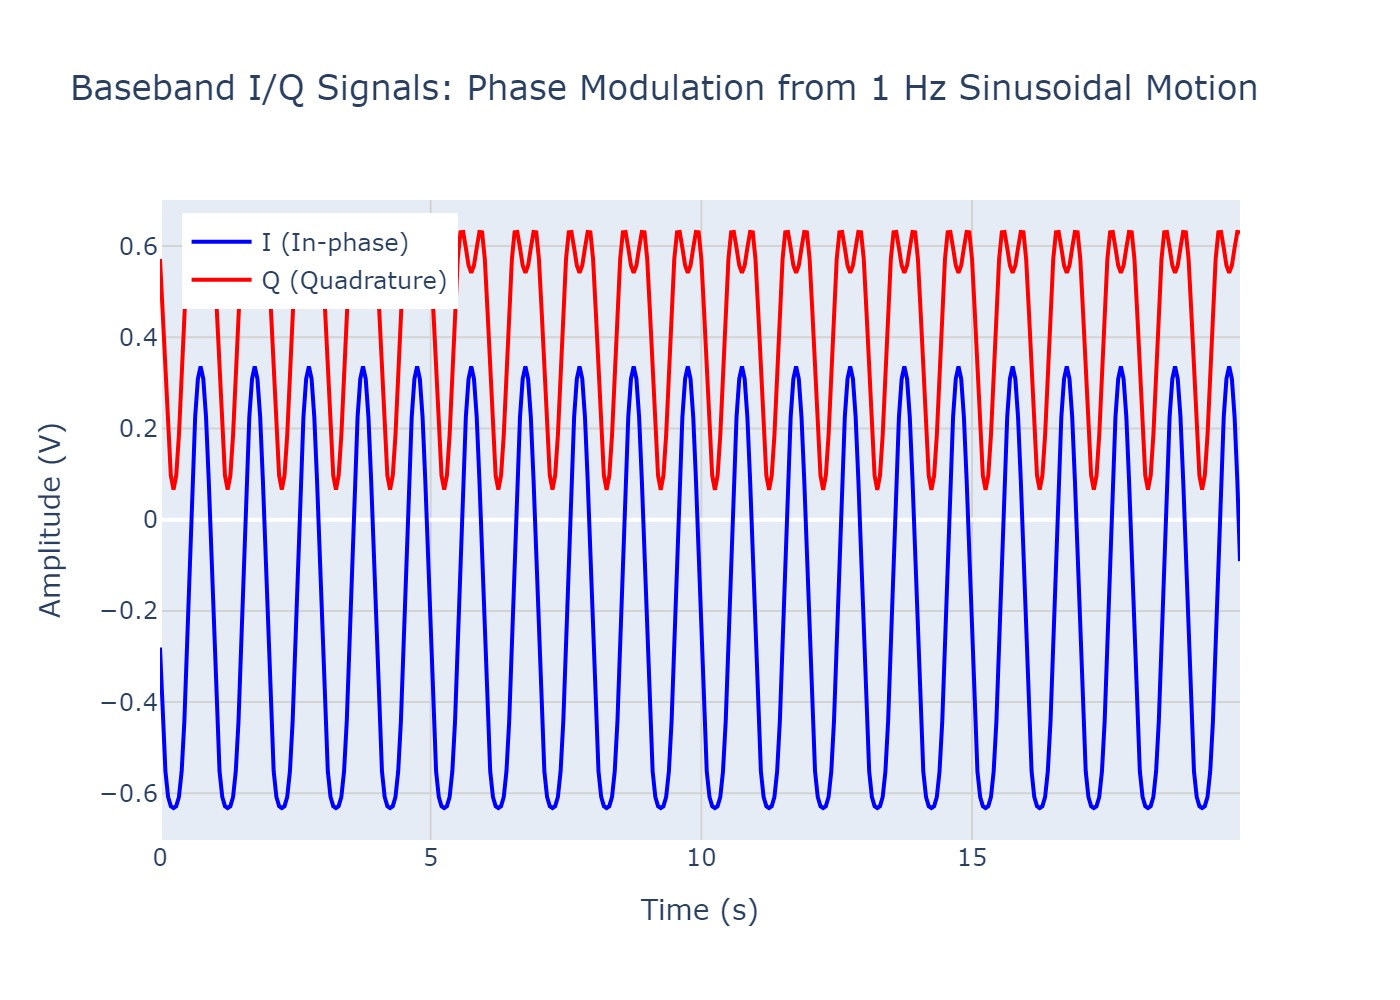

In [8]:
# Import plotting libraries
import plotly.graph_objs as go
from IPython.display import Image

# Create figure for time-domain I/Q visualization
fig = go.Figure()

# Plot In-phase (I) component
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],           # Time axis (seconds)
        y=np.real(baseband[0, 0, :]),  # Real part (I channel)
        name="I (In-phase)",
        line=dict(color='blue', width=2),
    )
)

# Plot Quadrature (Q) component
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],           # Time axis (seconds)
        y=np.imag(baseband[0, 0, :]),  # Imaginary part (Q channel)
        name="Q (Quadrature)",
        line=dict(color='red', width=2),
    )
)

# Configure plot layout
fig.update_layout(
    title="Baseband I/Q Signals: Phase Modulation from 1 Hz Sinusoidal Motion",
    yaxis=dict(title="Amplitude (V)", gridcolor='lightgray'),
    xaxis=dict(title="Time (s)", gridcolor='lightgray'),
    height=500,
    legend=dict(x=0.02, y=0.98),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Visualize I/Q Constellation

Display I/Q constellation plot showing circular trajectory from pure phase modulation.

**I/Q Constellation Interpretation:**

The I/Q constellation plots the complex baseband in the I-Q plane:
- **Horizontal Axis**: In-phase (I) component
- **Vertical Axis**: Quadrature (Q) component
- **Each Point**: One sample at instant in time
- **Trajectory**: Path traced over time

**For Pure Phase Modulation:**

When target motion causes only phase changes (constant amplitude):
- **Shape**: Perfect circle
- **Radius**: Constant signal amplitude
- **Angular Position**: Phase angle φ(t)
- **Motion**: Rotates sinusoidally (back-and-forth)

**This Example:**

- **Circle**: Indicates clean phase modulation
- **Amplitude**: Constant (no amplitude modulation from range variation)
- **1 Hz Oscillation**: Point moves along arc 1 time per second
- **Arc Length**: ±58° (1.01 radian swing from 1 mm motion)

**Contrast with Doppler:**

Pure Doppler would create continuous rotation; here we see oscillation along an arc.

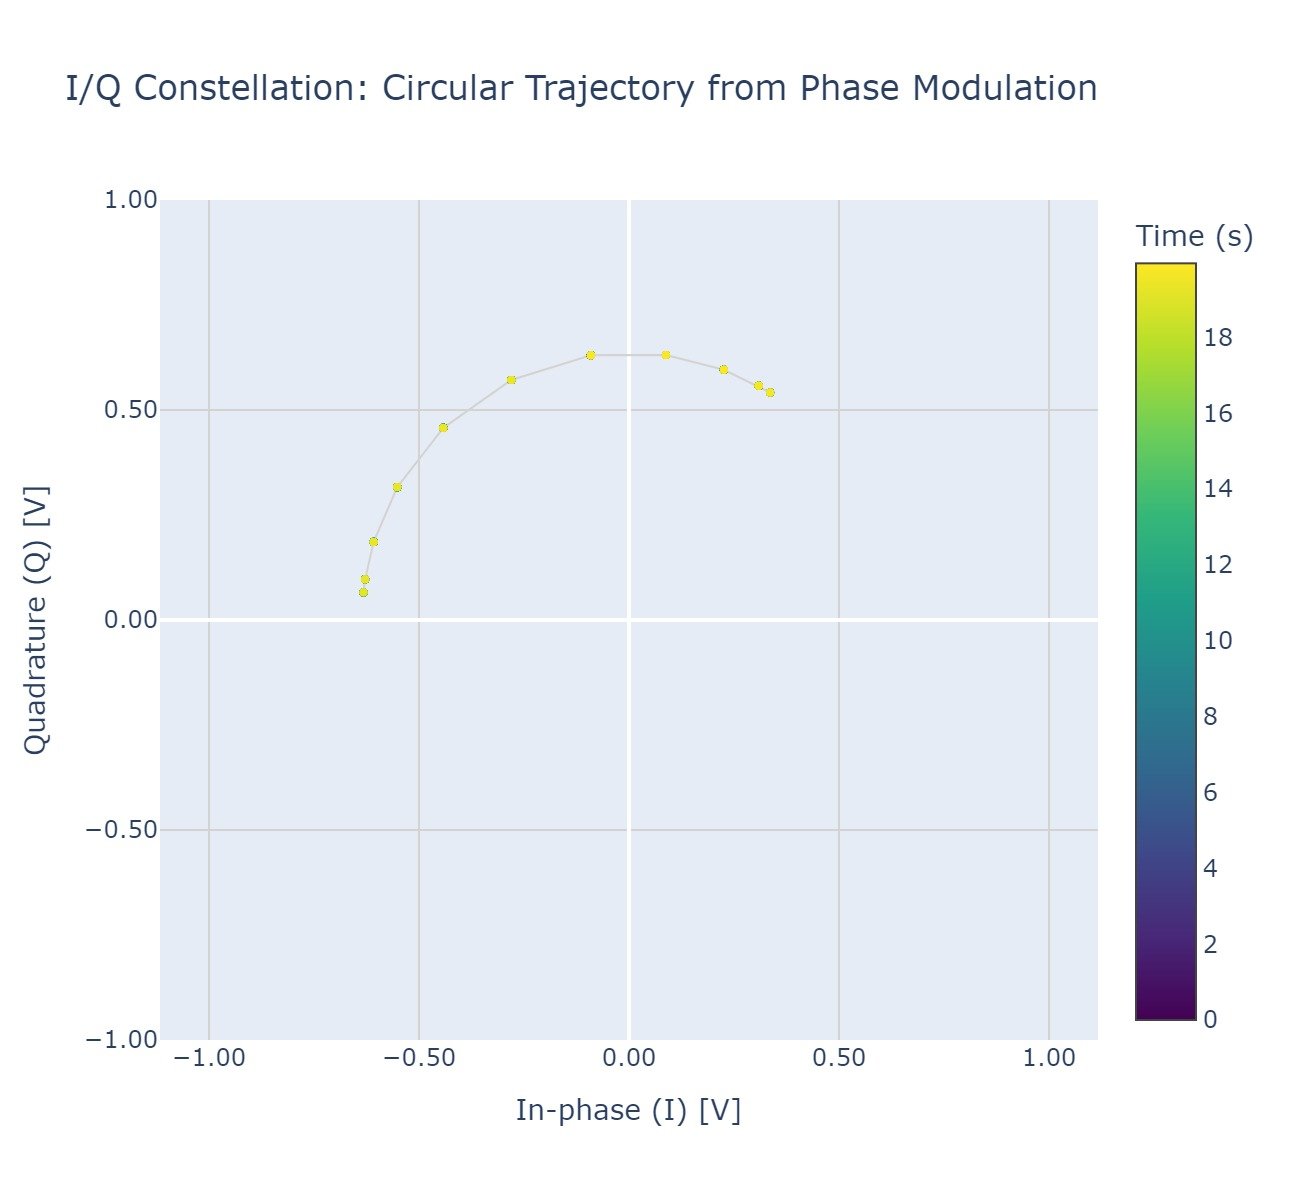

In [9]:
# Create figure for I/Q constellation
fig = go.Figure()

# Plot I/Q constellation (I vs. Q)
fig.add_trace(
    go.Scatter(
        x=np.real(baseband[0, 0, :]),  # I component (horizontal)
        y=np.imag(baseband[0, 0, :]),  # Q component (vertical)
        mode='markers+lines',           # Show trajectory with points
        marker=dict(
            size=4,
            color=timestamp[0, 0, :],   # Color by time
            colorscale='Viridis',
            colorbar=dict(title="Time (s)"),
            showscale=True,
        ),
        line=dict(color='lightgray', width=1),
        name="I/Q Trajectory",
    )
)

# Configure plot layout with equal aspect ratio
fig.update_layout(
    title="I/Q Constellation: Circular Trajectory from Phase Modulation",
    xaxis=dict(
        range=[-1, 1], 
        tickformat=".2f", 
        title="In-phase (I) [V]",
        gridcolor='lightgray',
    ),
    yaxis=dict(
        range=[-1, 1],
        tickformat=".2f",
        title="Quadrature (Q) [V]",
        scaleanchor="x",  # Equal aspect ratio
        scaleratio=1,
        gridcolor='lightgray',
    ),
    height=600,
    width=650,
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Phase Demodulation

Extract phase information from I/Q baseband to recover target motion.

### Arctangent Demodulation

**Phase Extraction Formula:**

From complex baseband $s(t) = I(t) + jQ(t)$:

$$\phi(t) = \arctan\left(\frac{Q(t)}{I(t)}\right) = \angle s(t)$$

**NumPy Implementation:**

`np.angle()` computes the phase angle of complex numbers, returning values in range $[-\pi, +\pi]$ radians.

**Expected Result:**

For our sinusoidal motion:

$$\phi(t) = \phi_0 + 1.01 \times \sin(2\pi \times 1 \times t)$$

Where:
- $\phi_0$ = Nominal phase from 1.4 m range
- $1.01$ rad = Phase deviation from 1 mm motion
- $1$ Hz = Motion frequency

**Physical Meaning:**

The demodulated phase directly represents target displacement:

$$\Delta r(t) = \frac{\lambda}{4\pi} \phi(t) = \frac{0.0124}{4\pi} \times 1.01 \times \sin(2\pi t) \approx 0.001 \times \sin(2\pi t)$$

Recovering the original 1 mm sinusoidal motion!

In [10]:
# Perform phase demodulation using arctangent
# np.angle() extracts phase from complex I/Q signal
demod = np.angle(baseband[0, 0, :])  # Phase in radians [-π, +π]

### Visualize Demodulated Phase

Display recovered phase signal showing 1 Hz sinusoidal motion pattern.

**Interpretation:**

- **Y-axis**: Phase (radians) → Proportional to displacement
- **X-axis**: Time (seconds)
- **Waveform**: Clean 1 Hz sinusoid
- **Amplitude**: ~1 rad (from 1 mm motion at 24 GHz)
- **Frequency**: 1 Hz (matches target motion)

**Displacement Calculation:**

To convert phase to displacement:

$$\Delta r = \frac{\lambda \cdot \phi}{4\pi} = \frac{1.24 \text{ cm} \times 1.01 \text{ rad}}{4\pi} \approx 1 \text{ mm}$$

The phase signal directly reveals the sub-millimeter motion, demonstrating interferometric radar's extreme sensitivity.

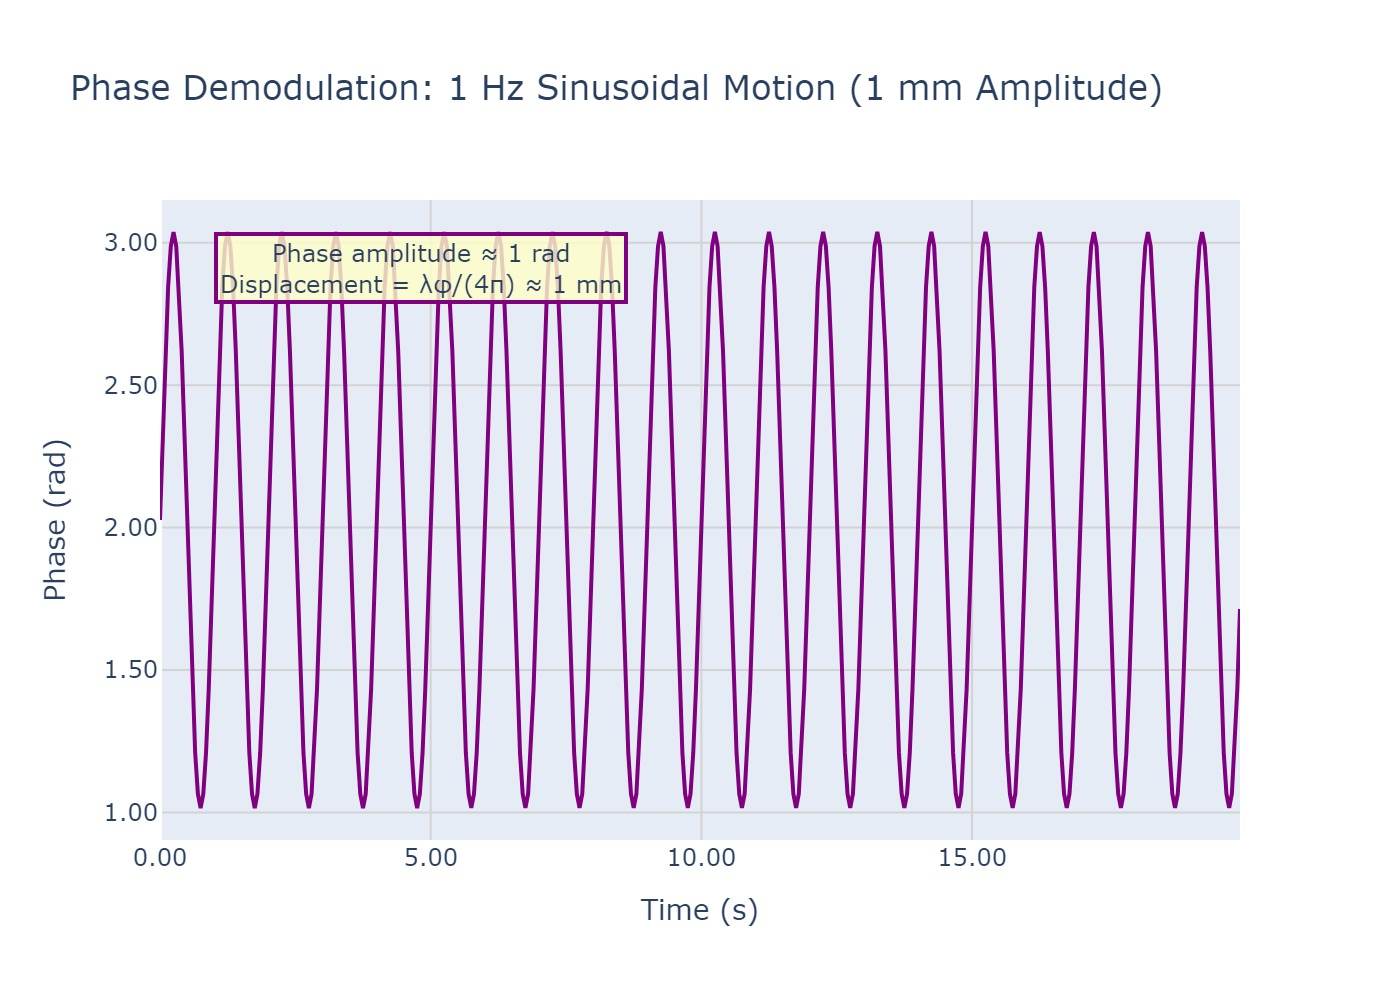

In [11]:
# Create figure for demodulated phase
fig = go.Figure()

# Plot demodulated phase vs. time
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],  # Time axis (seconds)
        y=demod,               # Phase (radians)
        line=dict(color='purple', width=2),
        name="Demodulated Phase",
    )
)

# Configure plot layout
fig.update_layout(
    title="Phase Demodulation: 1 Hz Sinusoidal Motion (1 mm Amplitude)",
    xaxis=dict(tickformat=".2f", title="Time (s)", gridcolor='lightgray'),
    yaxis=dict(tickformat=".2f", title="Phase (rad)", gridcolor='lightgray'),
    height=500,
    showlegend=False,
)

# Add annotation explaining phase-displacement relationship
fig.add_annotation(
    text=f"Phase amplitude ≈ 1 rad<br>Displacement = λφ/(4π) ≈ 1 mm",
    xref="paper", yref="paper",
    x=0.05, y=0.95,
    showarrow=False,
    bgcolor="rgba(255,255,200,0.8)",
    bordercolor="purple",
    borderwidth=2,
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Summary

In this notebook, you learned how to implement and analyze interferometric radar using RadarSimPy:

### Key Takeaways

**1. Interferometric Radar Principles**
- Understood phase-based motion detection
- Learned phase-displacement relationship: Δφ = 4πΔr/λ
- Recognized extreme sensitivity (sub-millimeter)
- Appreciated continuous wave (CW) operation

**2. CW Radar Configuration**
- Set up 24.125 GHz single-tone transmitter
- Configured 20-second continuous observation
- Used 20 Hz sampling (adequate for vital signs)
- Applied monostatic geometry (co-located TX/RX)

**3. Time-Varying Target Motion**
- Modeled sinusoidal displacement (1 mm, 1 Hz)
- Used timestamp array for time-dependent position
- Simulated respiratory motion pattern
- Calculated expected phase deviation (~1 rad)

**4. Phase Modulation**
- Observed pure phase modulation (constant amplitude)
- Understood I/Q encoding of phase information
- Generated baseband with sinusoidal phase variation
- Maintained coherent phase reference

**5. I/Q Visualization**
- Plotted time-domain I and Q components
- Observed sinusoidal waveforms (90° phase shift)
- Identified 1 Hz modulation frequency
- Verified clean phase modulation

**6. I/Q Constellation Analysis**
- Created I/Q plane visualization
- Observed circular trajectory from pure phase modulation
- Measured arc extent (±58° from 1 mm motion)
- Distinguished from Doppler (continuous rotation)

**7. Phase Demodulation**
- Applied arctangent to extract phase
- Used np.angle() for complex phase extraction
- Recovered sinusoidal phase signal at 1 Hz
- Validated against expected 1 rad amplitude

**8. Motion Recovery**
- Converted phase to displacement: Δr = λφ/(4π)
- Verified 1 mm motion amplitude
- Demonstrated sub-millimeter sensitivity
- Validated interferometric measurement principle

### Experiment Further

Try modifying the parameters to explore different scenarios:

**1. Motion Amplitude Variations**:
- Reduce to 0.1 mm, 0.5 mm (smaller motion)
- Increase to 5 mm, 10 mm (larger displacement)
- Observe phase deviation scaling
- Test detection limits

**2. Motion Frequency Studies**:
- Respiration: 0.2-0.5 Hz (12-30 breaths/min)
- Heartbeat: 1-2 Hz (60-120 bpm)
- Combination: respiration + cardiac
- Test frequency resolution

**3. Sampling Rate Effects**:
- Reduce to 10 Hz (minimum for 5 Hz motion)
- Increase to 100 Hz (higher temporal resolution)
- Observe Nyquist requirements
- Test aliasing effects

**4. Observation Time**:
- Reduce to 10 seconds (fewer cycles)
- Extend to 60 seconds (longer monitoring)
- Observe frequency resolution
- Balance time vs. update rate

**5. Carrier Frequency**:
- Test 10 GHz, 60 GHz, 77 GHz
- Observe wavelength effect: Δφ ∝ 1/λ
- Compare sensitivity across bands
- Understand frequency selection

**6. Complex Motion Patterns**:
- Multiple frequencies: respiratory + cardiac
- Triangular wave motion
- Step displacement
- Random walk

**7. Multiple Targets**:
- Add second target at different range
- Test interference effects
- Observe phase ambiguity
- Understand single-target assumption

**8. Range Variations**:
- Place target at 0.5 m, 2 m, 5 m
- Observe signal strength (1/R² loss)
- Test maximum range limits
- Understand SNR trade-offs

**9. Noise Effects**:
- Add receiver noise to baseband
- Observe phase noise impact
- Test SNR requirements
- Practice filtering techniques

**10. Phase Unwrapping**:
- Increase motion to 5 mm (>λ/4)
- Observe phase wrapping at ±π
- Implement unwrapping algorithm
- Recover continuous displacement

### Resources

- RadarSimPy Documentation: https://radarsimx.com
- RadarSimPy Simulator Module: https://radarsimx.github.io/radarsimpy/simulator.html
- Interferometric Radar: Phase-based measurement techniques
- CW Radar: Continuous wave radar principles
- Vital Signs Monitoring: Non-contact physiological sensing
- Phase Demodulation: Arctangent and I/Q processing
- I/Q Constellation: Complex signal visualization
- Phase Unwrapping: Continuous phase recovery
- Medical Radar: Healthcare applications and safety
- Motion Sensing: Precision displacement measurement